In [1]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# 첫 5행 출력
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# 데이터프레임 개요
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# notnull() 메서드로 누락 데이터 찾기
df.head().notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


In [6]:
!pip install missingno


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


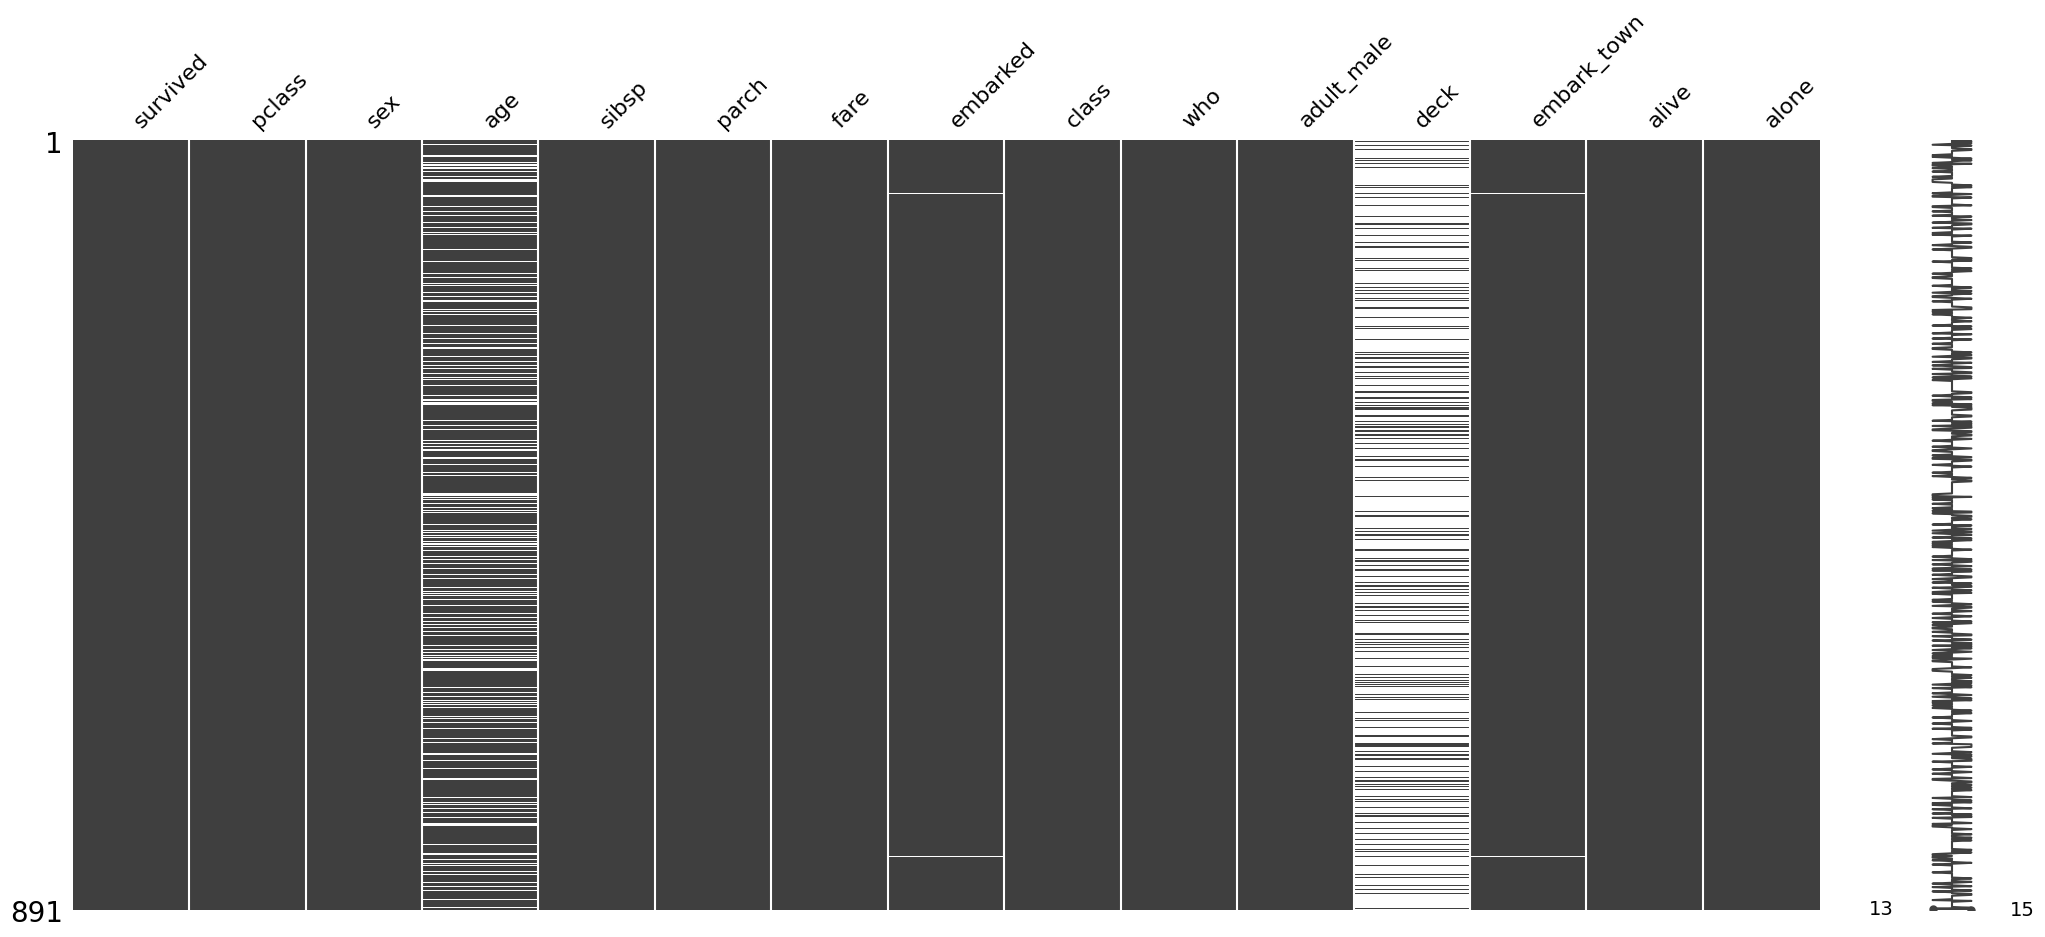

In [7]:
# missingno 라이브러리 활용
import missingno as msno
import matplotlib.pyplot as plt

# 매트릭스 그래프
msno.matrix(df)
plt.show()

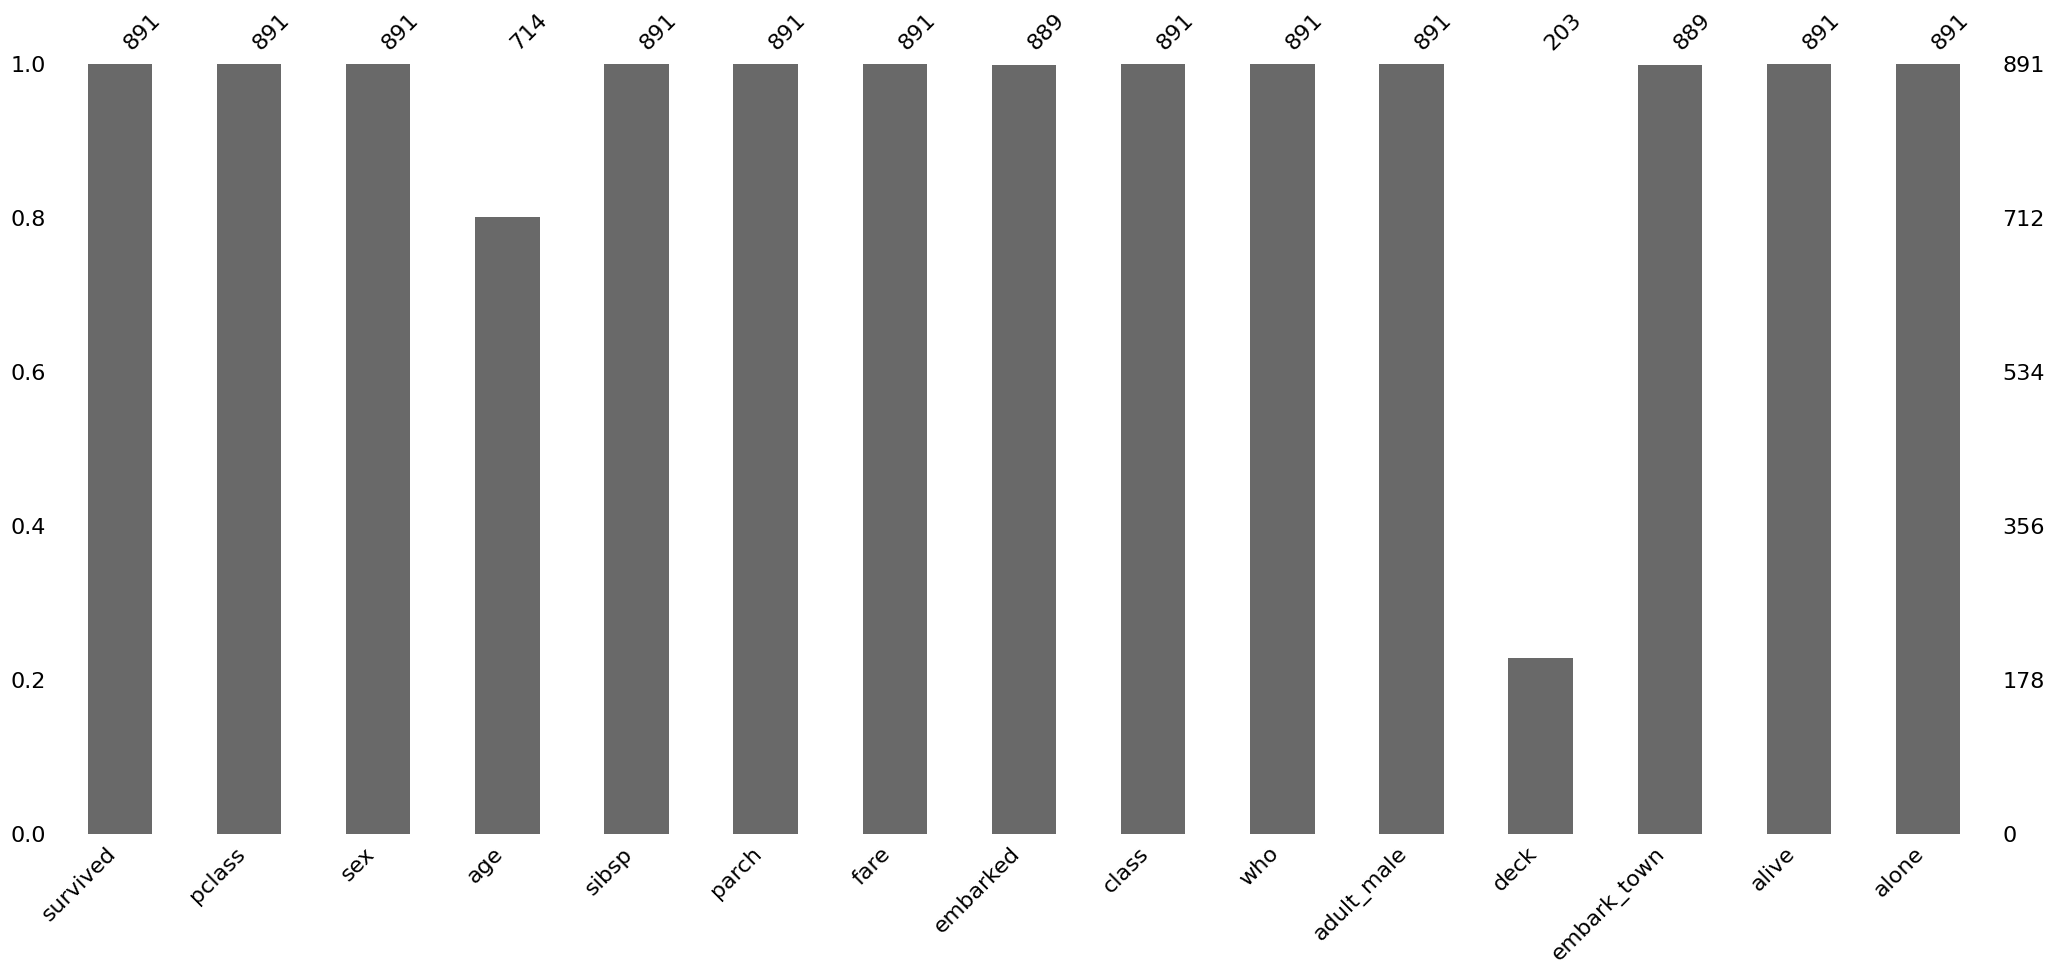

In [8]:
# 막대 그래프
msno.bar(df)
plt.show()

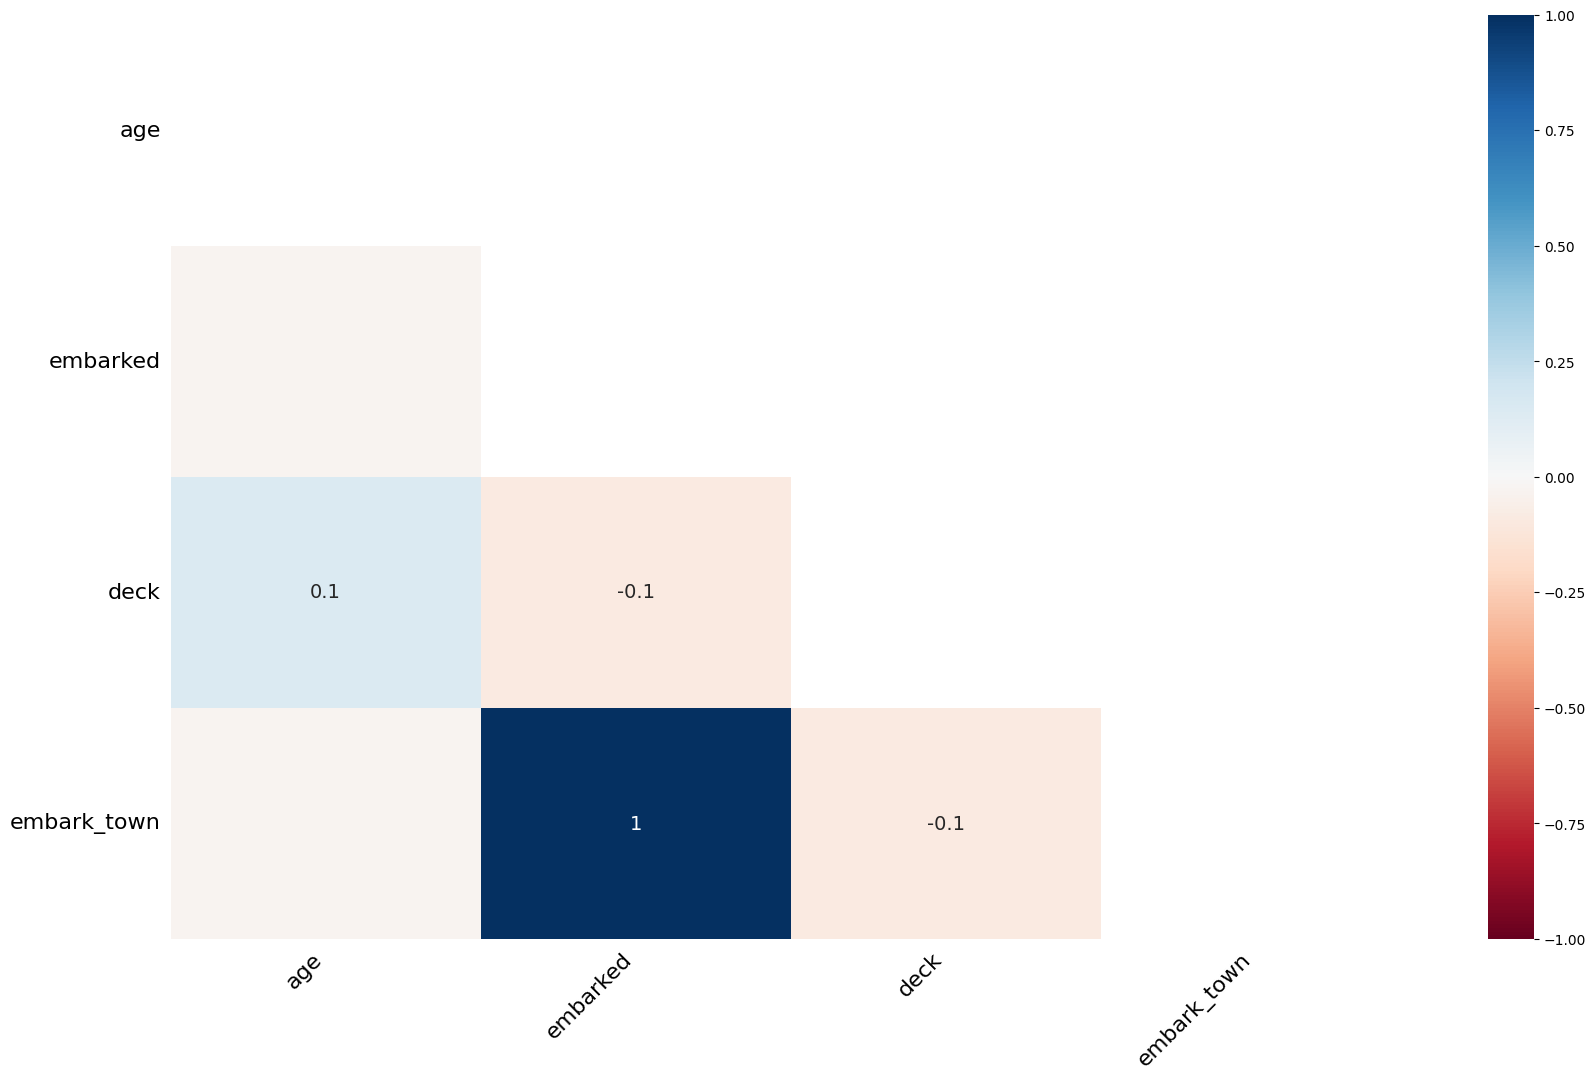

In [9]:
# 히트맵 
msno.heatmap(df)
plt.show()

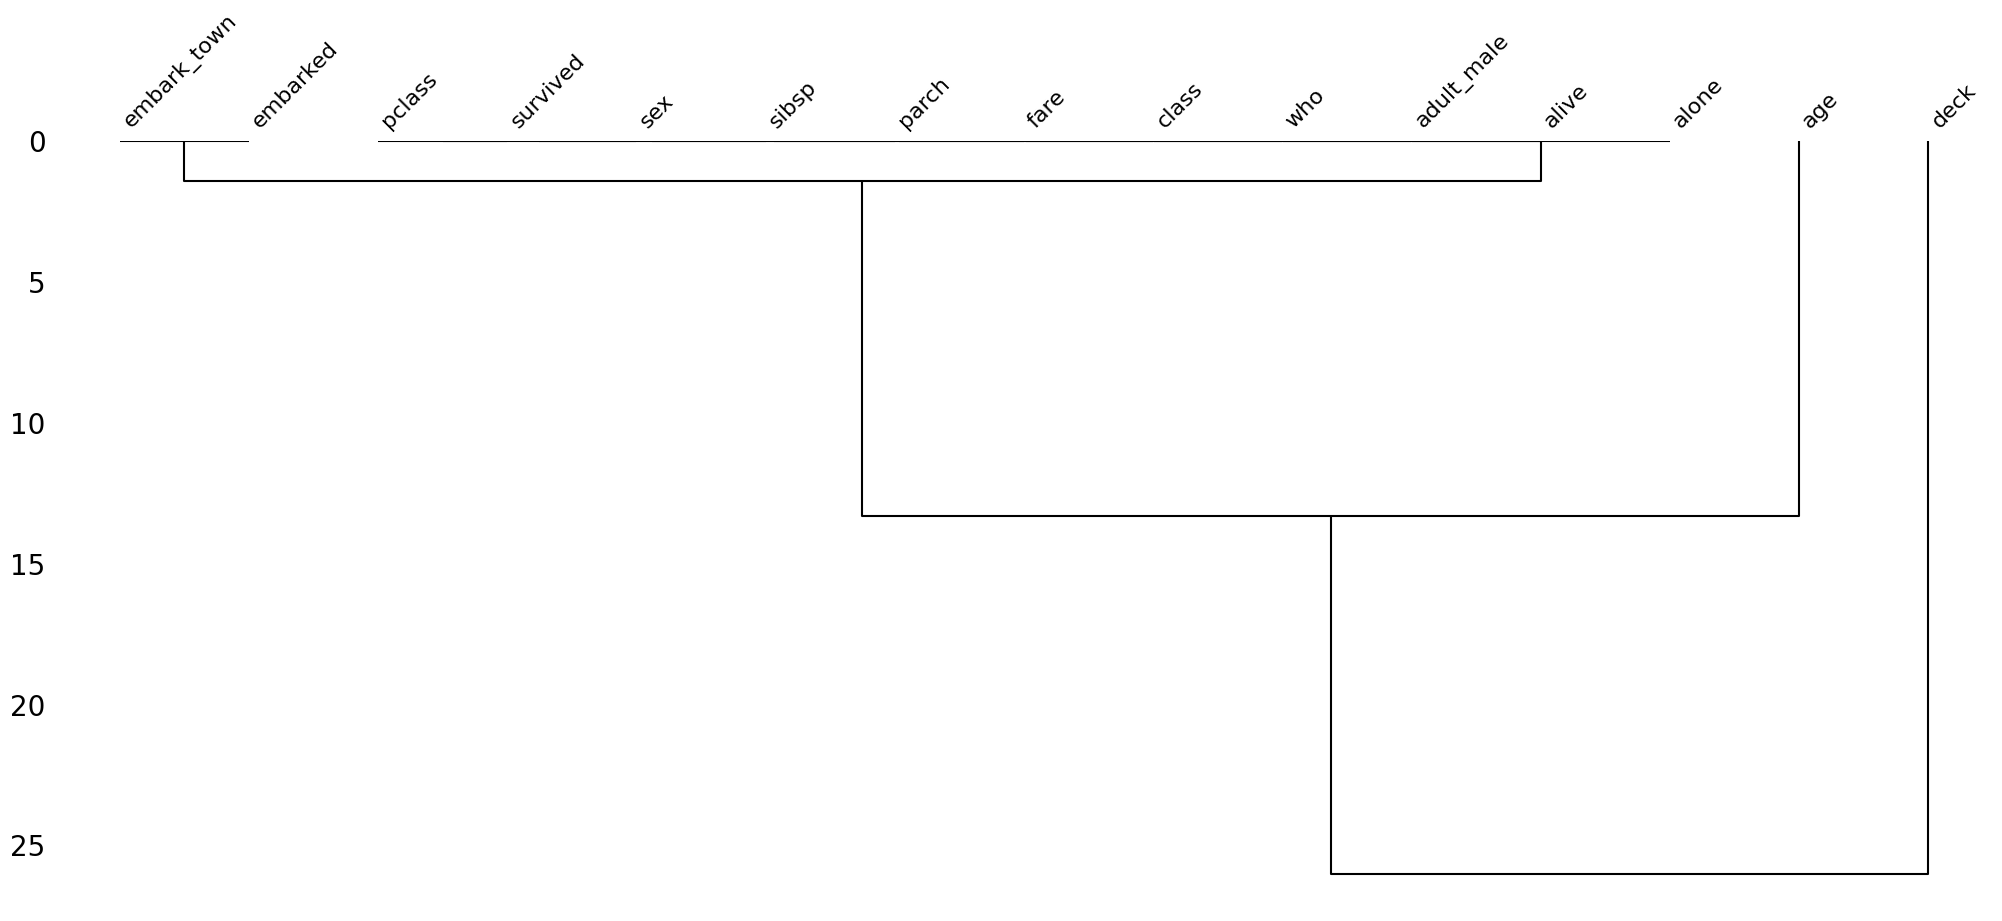

In [10]:
# 덴드로그램 
msno.dendrogram(df)
plt.show()

In [12]:
import pandas as pd
# 기존 방식 (np.nan): 정수형 자료가 float로 변환됨
ser1 = pd.Series([1, 2, None])
ser1

0    1.0
1    2.0
2    NaN
dtype: float64

In [13]:
# Nullable 자료형: 정수형이 그대로 유지됨 (결측치는 pd.NA로 표현)
ser2 = pd.Series([1, 2, None], dtype="Int64")
ser2

0       1
1       2
2    <NA>
dtype: Int64

In [14]:
# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# isnull() 메서드를 합계로 집계하여 각 열의 NaN 개수 계산하기
df.isnull().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)  
print(df_thresh.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [16]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df_age))

714


In [17]:
# age 열, deck 열 양쪽 모두 데이터가 없는 행을 삭제 
df_age_deck = df.dropna(subset=['age', 'deck'], how='all', axis=0)  
print(len(df_age_deck))

733


In [18]:
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [19]:
# 데이터프레임에서 중복 행을 제거 (기본값, keep='first')
df2 = df.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [20]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

# hp_bin 열의 범주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
horsepower_dummies.head(15)

FileNotFoundError: [Errno 2] No such file or directory: './data/auto-mpg.csv'

In [ ]:
# hp_bin 열의 범주형 데이터를 더미 변수로 변환 (dtype 지정)
horsepower_dummies_float = pd.get_dummies(df['hp_bin'], dtype=float)
horsepower_dummies_float.head()

In [ ]:
# hp_bin 열의 범주형 데이터를 더미 변수로 변환 (첫번째 열 제외)
horsepower_dummies_drop = pd.get_dummies(df['hp_bin'], dtype=float, 
                                          drop_first=True)
horsepower_dummies_drop.head()

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

# sklern 라이브러리 불러오기
from sklearn import preprocessing    

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder()       # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()     # one hot encoder 생성

# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))  
print(onehot_labeled)
print(type(onehot_labeled))

# 2차원 행렬로 형태 변경
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled), 1) 
print(onehot_reshaped)
print(type(onehot_reshaped))

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)
print(type(onehot_fitted))

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)을 확인
df['horsepower'].describe()

In [ ]:
# horsepower 열을 Min-Max Scaling 적용 (판다스)
df['horsepower_minmax'] = (df['horsepower'] - df['horsepower'].min()) / \
                          (df['horsepower'].max() - df['horsepower'].min()) 

df['horsepower_minmax'].head()

In [ ]:
# horsepower 열을 Min-Max Scaling 적용 (사이킷런)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['horsepower_minmax'] = scaler.fit_transform(df[['horsepower']])
df['horsepower_minmax'].head()

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)을 확인
df['horsepower'].describe()

In [ ]:
# horsepower 열을 Standard Scaling 적용 (판다스)
df['horsepower_standard'] = (df['horsepower'] - df['horsepower'].mean()) / \
                             df['horsepower'].std()

df['horsepower_standard'].head()

In [ ]:
# horsepower 열을 Standard Scaling 적용 (사이킷런)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['horsepower_standard'] = scaler.fit_transform(df[['horsepower']])
df['horsepower_standard'].head()

In [ ]:
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 CSV 파일을 가져와서 df로 변환
df = pd.read_csv('./data/stock-data.csv')

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())

In [ ]:
# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())
print('\n')
print(type(df['new_Date'][0]))

In [ ]:
# 라이브러리 불러오기
import pandas as pd

# 날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
ts_dates = pd.to_datetime(dates)   
print(ts_dates)

# Timestamp를 Period로 변환
pr_day = ts_dates.to_period(freq='D')
print(pr_day)
pr_month = ts_dates.to_period(freq='M')
print(pr_month)
pr_year = ts_dates.to_period(freq='Y')
print(pr_year)

In [ ]:
# 라이브러리 불러오기
import pandas as pd

# Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준
ts_ms = pd.date_range(start='2024-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=6,                # 생성할 Timestamp의 개수
                   freq='MS',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')          # 시간대(timezone)

print(ts_ms)

In [ ]:
# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2024-01-01', periods=6, 
                       freq='ME',              # 시간 간격 (ME: 월의 마지막 날)
                       tz='Asia/Seoul')        # 시간대(timezone)
print(ts_me)

In [ ]:
# 분기(3개월) 간격, 월의 첫째 날 기준
ts_3m = pd.date_range('2024-01-01', periods=6, 
                       freq='3MS',             # 시간 간격 (3MS: 3개월)
                       tz='Asia/Seoul')        # 시간대(timezone)
print(ts_3m)

In [ ]:
# 라이브러리 불러오기
import pandas as pd

# Period 배열 만들기 - 1개월 주기
pr_m = pd.period_range(start='2024-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='M')                   # 주기 (M: 월)
print(pr_m)

In [ ]:
# Period 배열 만들기 - 1시간 주기
pr_h = pd.period_range(start='2024-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='h')                   # 주기 (h: 시간)
print(pr_h)

In [ ]:
# Period 배열 만들기 - 2일 주기
pr_2h = pd.period_range(start='2024-01-01',    # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='2d')                  # 주기 (2d: 2일)
print(pr_2h)